# Regression with dummy variables

In [1]:
"""A study was conducted to measure the effect of gender and income
on attitude towards vocation. Data was collected from 30 respondents and is
given in Travel_dummy_reg file. Attitude towards vocation is measured on a 9
point scale. Gender is coded as male = 1 and female = 2. Income is coded as
low=1, medium = 2 and high = 3. Develop a model for attitude towards
vocation in terms of gender and Income?"""


'A study was conducted to measure the effect of gender and income\non attitude towards vocation. Data was collected from 30 respondents and is\ngiven in Travel_dummy_reg file. Attitude towards vocation is measured on a 9\npoint scale. Gender is coded as male = 1 and female = 2. Income is coded as\nlow=1, medium = 2 and high = 3. Develop a model for attitude towards\nvocation in terms of gender and Income?'

### Import packages

In [3]:
from google.colab import files
import io
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt 
import math 
from pandas.plotting import scatter_matrix 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Read The Data

In [4]:
uploaded = files.upload()
#mydata = mypd.read_csv("E:/ISI/Data/Travel_dummy_Reg.csv")
data=pd.read_csv(io.BytesIO(uploaded['Travel_dummy_Reg.csv']))
data
gender = data.Gender
income = data.Income
attitude = data.Attitude

Saving Travel_dummy_Reg.csv to Travel_dummy_Reg.csv


## check the relation between X and Y
### Attitude Vs Gender

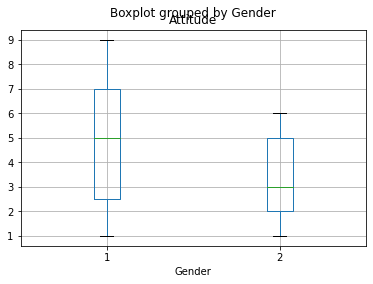

In [5]:
data.boxplot(column = "Attitude", by = "Gender")
plt.show()

### Attitude Vs Income

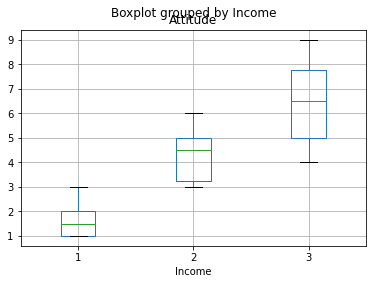

In [6]:
data.boxplot(column = "Attitude", by = "Income")
plt.show()

## Regression with dummy variable

In [7]:
model = ols('attitude~C(gender)+C(income)',data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attitude   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     53.37
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           3.02e-11
Time:                        07:51:24   Log-Likelihood:                -37.916
No. Observations:                  30   AIC:                             83.83
Df Residuals:                      26   BIC:                             89.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4000      0.336      7.145      0.000       1.710       3.090
C(gender)[T.2]    -1.6000      0.336     -4.763      0.000      -2.290      -0.910
C(income)[T.2]     2.8000      0.411      6.806      0.000       1.954       3.646
C(income)[T.3]     4.8000      0.411     11.668      0.000       3.954       5.646
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.615
Skew:                           0.089   Prob(JB):                        0.735
Kurtosis:                       2.322   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## anova Table

In [8]:
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,19.200000,19.200000,22.690909,6.274380e-05
C(income),2.0,116.266667,58.133333,68.703030,4.189551e-11
Residual,26.0,22.000000,0.846154,NaN,NaN


### prediction

In [9]:
pred = model.predict()
pred
res = attitude - pred
res

0    -0.4
1     0.6
2    -1.4
3    -1.4
4    -0.4
5    -1.2
6    -0.2
7    -0.2
8     0.8
9     0.8
10    0.8
11    1.8
12    0.8
13   -0.2
14   -0.2
15    0.2
16    0.2
17    1.2
18    1.2
19    0.2
20   -0.6
21    0.4
22    1.4
23   -0.6
24   -0.6
25   -0.6
26   -0.6
27   -0.6
28   -1.6
29    0.4
Name: Attitude, dtype: float64

### normlaity Test for Residuals

Q-Q plot

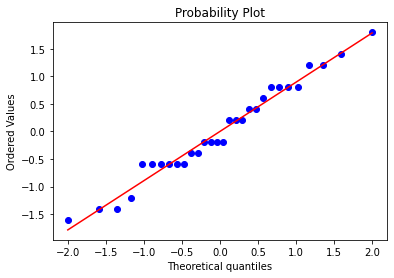

In [10]:
import matplotlib.pyplot as plt
stats.probplot(res,plot=plt)
plt.show()

Shapiro - wilk test

In [11]:
stats.mstats.normaltest(res)

NormaltestResult(statistic=0.5211198961155473, pvalue=0.7706199578215551)